## Start measuring elapsed time

In [1]:
import timeit
start_time = timeit.default_timer()

## Import libraries

In [2]:
# Import libraries
import time
import datetime
import pandas as pd
import io
import matplotlib.pyplot as plt

## Read the latest data

In [3]:
pd.set_option('display.max_column',None)
tomorrow = (datetime.date.today() + datetime.timedelta(days=1)).isoformat() #get tomorrow in iso format as needed'''
url = pd.read_html("https://markets.ft.com/data/funds/tearsheet/historical?s=LU0119216553:EUR", header=0)
table = url[0]
gsef_latest = table[['Date', 'Close']]
gsef_latest_selected= gsef_latest.copy()

## Transform the latest data

In [4]:
gsef_latest_selected['Date'] = gsef_latest_selected.loc[:,'Date'].str[-12:]
gsef_latest_selected['Date'] = pd.to_datetime(gsef_latest_selected['Date'], dayfirst=True)

## Read the saved historical data

In [5]:
gsef_historical= pd.read_csv('gsef_folder/historical_gsef.csv', parse_dates=['Date'], dayfirst=True)

## Combine the latest data with the historical data

In [6]:
gsef = pd.concat([gsef_latest_selected, gsef_historical], ignore_index=True).sort_values(by="Date")

gsef = gsef.reset_index(drop=True)

## Calculate the day over day percentage change

In [7]:
gsef['pct_change']= (gsef["Close"].pct_change()*100).round(2)

## Remove rows that have a duplicate date

In [8]:
gsef = gsef.drop_duplicates('Date')

## Save the updated historical data

In [9]:
gsef.to_csv('gsef_folder/historical_gsef.csv', index=False)

## Plot and save the historical data

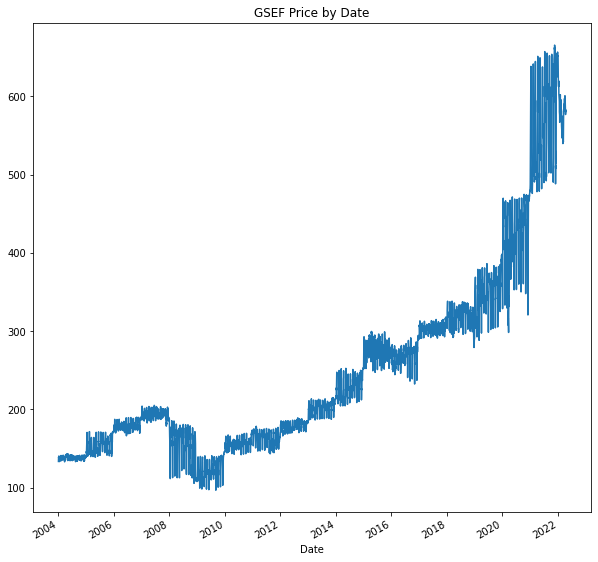

In [17]:
gsef.plot(x= 'Date', y='Close', figsize=(10,10), title= 'GSEF Price by Date', legend=False)

historical_chart= 'gsef_folder/gsef_historical.png'

import os
if os.path.exists(historical_chart):
  os.remove(historical_chart)
else:
  print("The historical chart didn't exist and it has been created.")

plt.savefig('gsef_folder/gsef_historical.png')

plt.show()

## Calculate and print the time elapsed

In [ ]:
# Calculate and print the time elapsed to run ETL process and the date and time of the latest run
time_elapsed = timeit.default_timer() - start_time

time_elapsed_seconds = int(time_elapsed % 60)

now = datetime.datetime.now()

print("\n Success! Your GSEF data has been updated in {} seconds on {}".format(time_elapsed_seconds, now.strftime("%Y-%m-%d %H:%M:%S")))